In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

from ML import TwoLens1S
from ML import ThreeLens1S

# Treating a Star-Planet system as One Lens

In [2]:
def compare_star_planet(t0, tE, rho, u0_list, alpha, phi, s12, s23, q2, q3):
    #Star and Planet as One Lens
    m1 = 1
    m2 = q2 * m1
    m3 = q3 * m1
    q_2lens = m3 / (m1 + m2)
    s_eff = s12 + s23

    triple = ThreeLens1S(t0, tE, rho, u0_list, q2, q3, s12, s23, alpha, phi)
    double = TwoLens1S(t0, tE, rho, u0_list, q_2lens, s_eff, alpha)

    tau = triple.tau

    fig = plt.figure(figsize=(14, 12))
    gs = GridSpec(3, 2, figure=fig, height_ratios=[1.5, 1, .5])

    ax_cau_3l1s = fig.add_subplot(gs[0, 0])
    ax_cau_2l1s = fig.add_subplot(gs[0, 1])
    ax_lc_3l1s = fig.add_subplot(gs[1, 0])
    ax_lc_2l1s = fig.add_subplot(gs[1, 1])
    ax_resid = fig.add_subplot(gs[2, :])

    # --- Plot Triple Caustics ---
    triple._setting_parameters()
    caustics_3 = triple.VBM.Multicaustics()
    crits_3 = triple.VBM.Multicriticalcurves()
    for cau in caustics_3:
        ax_cau_3l1s.plot(cau[0], cau[1], 'r', lw=1.2)
    for crit in crits_3:
        ax_cau_3l1s.plot(crit[0], crit[1], 'k--', lw=0.8)
    for system in triple.systems:
        ax_cau_3l1s.plot(system['x_src'], system['y_src'], '--', color=system['color'], alpha=0.6)
    for x, y in triple._compute_lens_positions():
        ax_cau_3l1s.plot(x, y, 'ko')

    ax_cau_3l1s.set_title("3L1S Caustics")
    ax_cau_3l1s.set_xlim(-2, 2)
    ax_cau_3l1s.set_ylim(-2, 2)
    ax_cau_3l1s.set_aspect("equal")
    ax_cau_3l1s.grid(True)

    # --- Plot Double Caustics ---
    caustics_2 = double.VBM.Caustics(double.s, double.q)
    crits_2 = double.VBM.Criticalcurves(double.s, double.q)
    for cau in caustics_2:
        ax_cau_2l1s.plot(cau[0], cau[1], 'r', lw=1.2)
    for crit in crits_2:
        ax_cau_2l1s.plot(crit[0], crit[1], 'k--', lw=0.8)
    for system in double.systems:
        ax_cau_2l1s.plot(system['x_src'], system['y_src'], '--', color=system['color'], alpha=0.6)
    x1 = -double.s * double.q / (1 + double.q)
    x2 = double.s / (1 + double.q)
    ax_cau_2l1s.plot([x1, x2], [0, 0], 'ko')

    ax_cau_2l1s.set_title("2L1S Caustics")
    ax_cau_2l1s.set_xlim(-2, 2)
    ax_cau_2l1s.set_ylim(-2, 2)
    ax_cau_2l1s.set_aspect("equal")
    ax_cau_2l1s.grid(True)

    # --- Plot Light Curves ---
    for system in triple.systems:
        ax_lc_3l1s.plot(tau, system['mag'], color=system['color'], label=fr"$u_0$ = {system['u0']}")
    ax_lc_3l1s.set_title("3L1S Light Curve")
    ax_lc_3l1s.set_xlabel(r"Time ($\tau$)")
    ax_lc_3l1s.set_ylabel("Magnification")
    ax_lc_3l1s.grid(True)
    ax_lc_3l1s.legend()

    for system in double.systems:
        ax_lc_2l1s.plot(tau, system['mag'], color=system['color'], label=fr"$u_0$ = {system['u0']}")
    ax_lc_2l1s.set_title("2L1S Light Curve")
    ax_lc_2l1s.set_xlabel(r"Time ($\tau$)")
    ax_lc_2l1s.set_ylabel("Magnification")
    ax_lc_2l1s.grid(True)
    ax_lc_2l1s.legend()

    # --- Plot Residuals ---
    for d, t in zip(double.systems, triple.systems):
        residual = (np.array(t['mag']) - np.array(d['mag']))
        ax_resid.plot(tau, residual, color=t['color'], label=fr"$u_0$ = {t['u0']}")

    ax_resid.set_title("Residuals (3L1S - 2L1S)")
    ax_resid.set_xlabel(r"Time ($\tau$)")
    ax_resid.set_ylabel("Residual")
    ax_resid.axhline(0, color='k', linestyle='--', lw=0.5)
    ax_resid.grid(True)
    ax_resid.legend()

    plt.tight_layout()
    plt.show()

    lens_positions = triple._compute_lens_positions()
    for x, y in lens_positions:
        ax_cau_3l1s.plot(x, y, 'ko')
    #print("Lens positions (3L1S):", lens_positions)
    #print(max(t['mag']))
    #print(max(d['mag']))

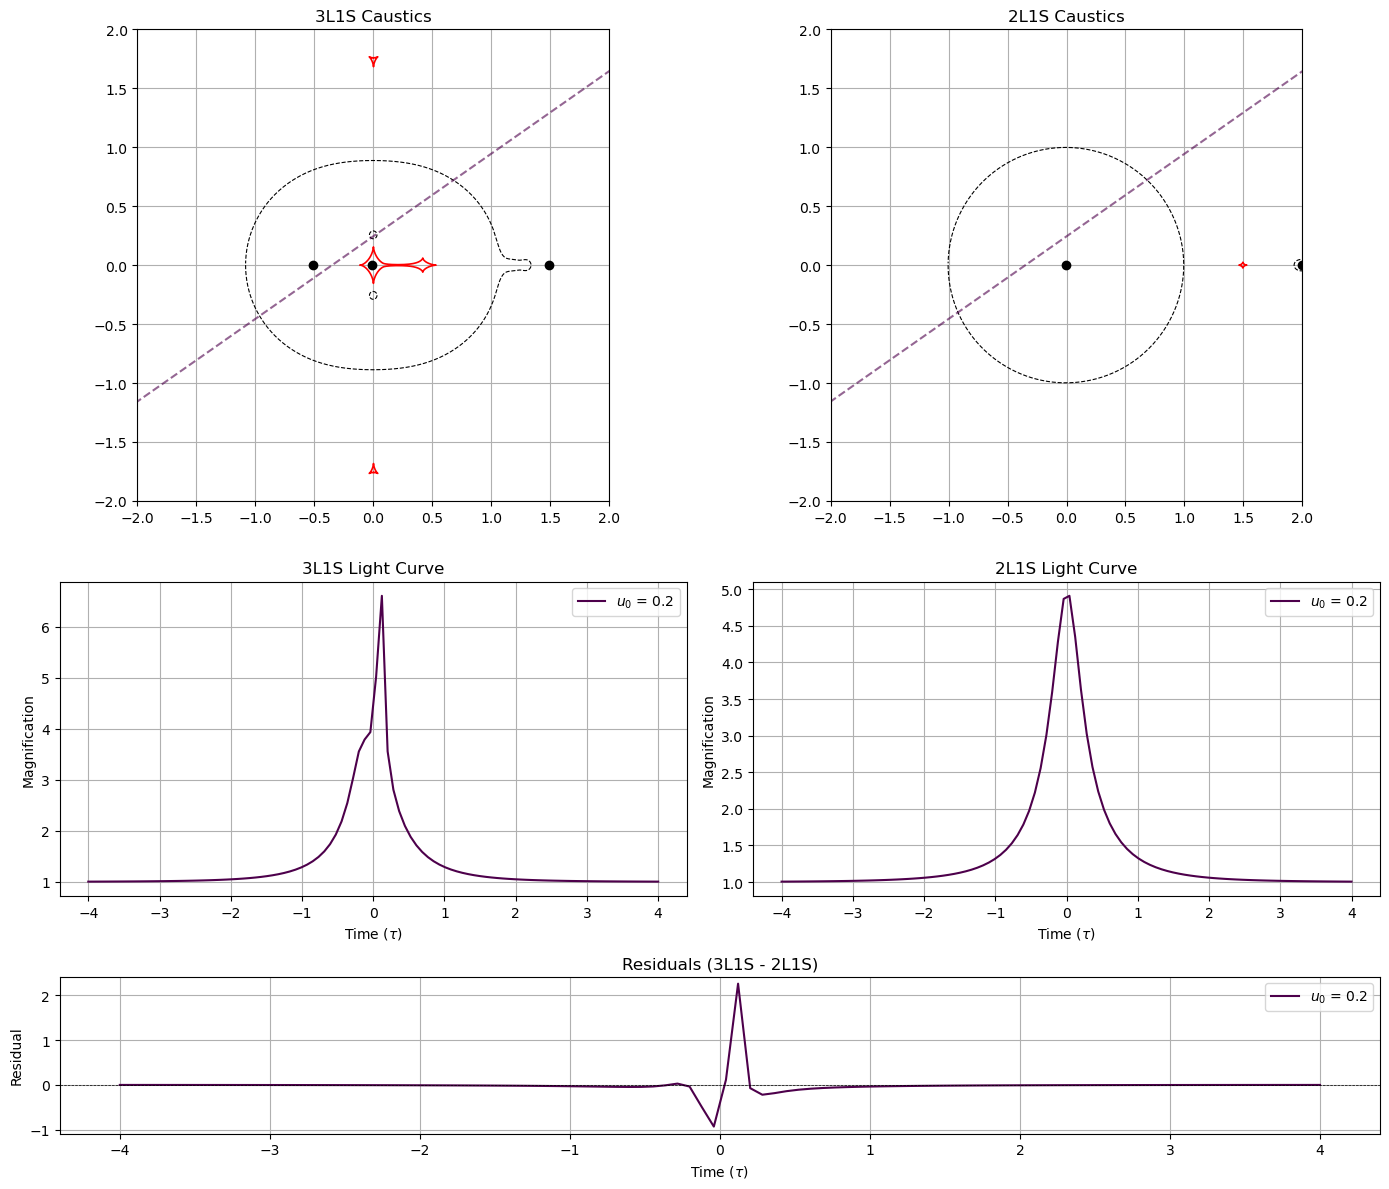

In [3]:
#c_  ple_lightcurves(t0, tE, rho, u0_list, alpha, phi, s12, s23, q2, q3)
compare_star_planet(  0, 20, 0.01, [.2],     35,    0,  .5,   1.5,  1, .006)

# Treating a Planet-Moon system as One Lens

In [4]:
def compare_planet_moon(t0, tE, rho, u0_list, alpha, phi, s12, s23, q2, q3):
    #Planet and Moon as One Lens
    m1 = 1
    m2 = q2 * m1
    m3 = q3 * m1
    q_2lens = (m2 + m3)/m1
    s_eff = s23

    triple = ThreeLens1S(t0, tE, rho, u0_list, q2, q3, s12, s23, alpha, phi)
    double = TwoLens1S(t0, tE, rho, u0_list, q_2lens, s_eff, alpha)

    tau = triple.tau

    fig = plt.figure(figsize=(14, 12))
    gs = GridSpec(3, 2, figure=fig, height_ratios=[1.5, 1, .5])

    ax_cau_3l1s = fig.add_subplot(gs[0, 0])
    ax_cau_2l1s = fig.add_subplot(gs[0, 1])
    ax_lc_3l1s = fig.add_subplot(gs[1, 0])
    ax_lc_2l1s = fig.add_subplot(gs[1, 1])
    ax_resid = fig.add_subplot(gs[2, :])

    # --- Plot Triple Caustics ---
    triple._setting_parameters()
    caustics_3 = triple.VBM.Multicaustics()
    crits_3 = triple.VBM.Multicriticalcurves()
    for cau in caustics_3:
        ax_cau_3l1s.plot(cau[0], cau[1], 'r', lw=1.2)
    for crit in crits_3:
        ax_cau_3l1s.plot(crit[0], crit[1], 'k--', lw=0.8)
    for system in triple.systems:
        ax_cau_3l1s.plot(system['x_src'], system['y_src'], '--', color=system['color'], alpha=0.6)
    for x, y in triple._compute_lens_positions():
        ax_cau_3l1s.plot(x, y, 'ko')

    ax_cau_3l1s.set_title("3L1S Caustics")
    ax_cau_3l1s.set_xlim(-2, 2)
    ax_cau_3l1s.set_ylim(-2, 2)
    ax_cau_3l1s.set_aspect("equal")
    ax_cau_3l1s.grid(True)

    # --- Plot Double Caustics ---
    caustics_2 = double.VBM.Caustics(double.s, double.q)
    crits_2 = double.VBM.Criticalcurves(double.s, double.q)
    for cau in caustics_2:
        ax_cau_2l1s.plot(cau[0], cau[1], 'r', lw=1.2)
    for crit in crits_2:
        ax_cau_2l1s.plot(crit[0], crit[1], 'k--', lw=0.8)
    for system in double.systems:
        ax_cau_2l1s.plot(system['x_src'], system['y_src'], '--', color=system['color'], alpha=0.6)
    x1 = -double.s * double.q / (1 + double.q)
    x2 = double.s / (1 + double.q)
    ax_cau_2l1s.plot([x1, x2], [0, 0], 'ko')

    ax_cau_2l1s.set_title("2L1S Caustics")
    ax_cau_2l1s.set_xlim(-2, 2)
    ax_cau_2l1s.set_ylim(-2, 2)
    ax_cau_2l1s.set_aspect("equal")
    ax_cau_2l1s.grid(True)

    # --- Plot Light Curves ---
    for system in triple.systems:
        ax_lc_3l1s.plot(tau, system['mag'], color=system['color'], label=fr"$u_0$ = {system['u0']}")
    ax_lc_3l1s.set_title("3L1S Light Curve")
    ax_lc_3l1s.set_xlabel(r"Time ($\tau$)")
    ax_lc_3l1s.set_ylabel("Magnification")
    ax_lc_3l1s.grid(True)
    ax_lc_3l1s.legend()

    for system in double.systems:
        ax_lc_2l1s.plot(tau, system['mag'], color=system['color'], label=fr"$u_0$ = {system['u0']}")
    ax_lc_2l1s.set_title("2L1S Light Curve")
    ax_lc_2l1s.set_xlabel(r"Time ($\tau$)")
    ax_lc_2l1s.set_ylabel("Magnification")
    ax_lc_2l1s.grid(True)
    ax_lc_2l1s.legend()

    # --- Plot Residuals ---
    for d, t in zip(double.systems, triple.systems):
        residual = (np.array(t['mag']) - np.array(d['mag']))
        ax_resid.plot(tau, residual, color=t['color'], label=fr"$u_0$ = {t['u0']}")

    ax_resid.set_title("Residuals (3L1S - 2L1S)")
    ax_resid.set_xlabel(r"Time ($\tau$)")
    ax_resid.set_ylabel("Residual")
    ax_resid.axhline(0, color='k', linestyle='--', lw=0.5)
    ax_resid.grid(True)
    ax_resid.legend()

    plt.tight_layout()
    plt.show()

    lens_positions = triple._compute_lens_positions()
    for x, y in lens_positions:
        ax_cau_3l1s.plot(x, y, 'ko')
    print("Lens positions (3L1S):", lens_positions)

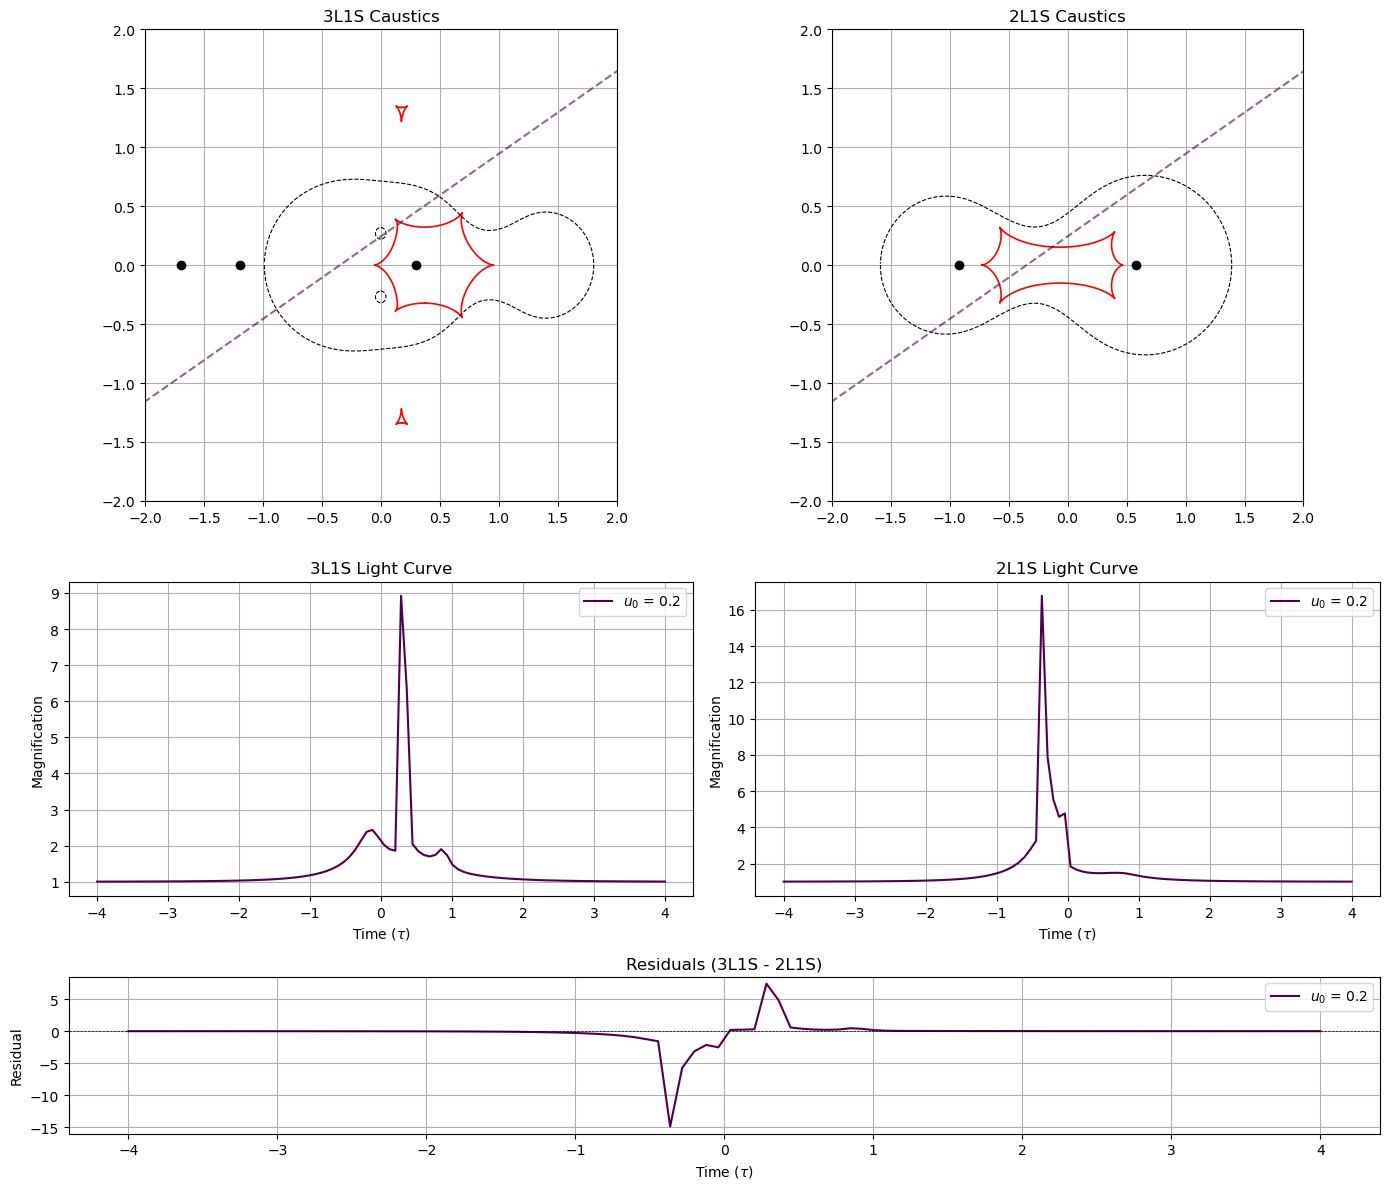

Lens positions (3L1S): [(-1.7, 0), (-1.2, 0), (0.30000000000000004, 0)]


In [5]:
compare_planet_moon(  0, 20, 0.01, [.2],     35,    0,  .5,   1.5,  1, .6)

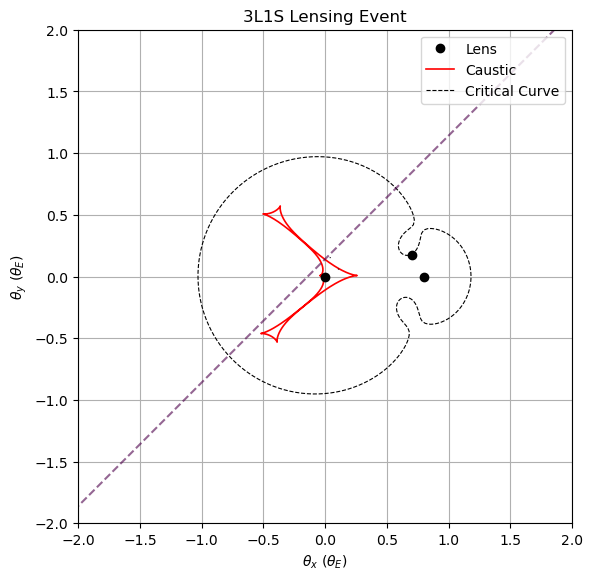

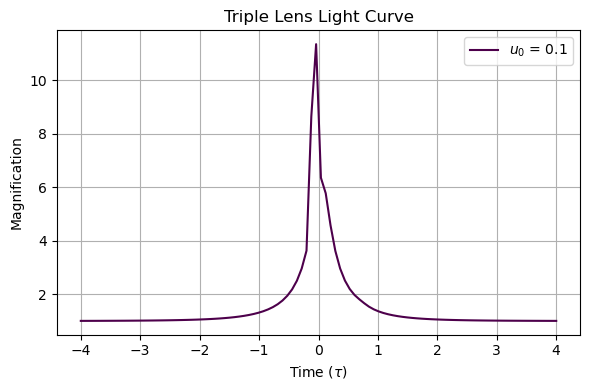

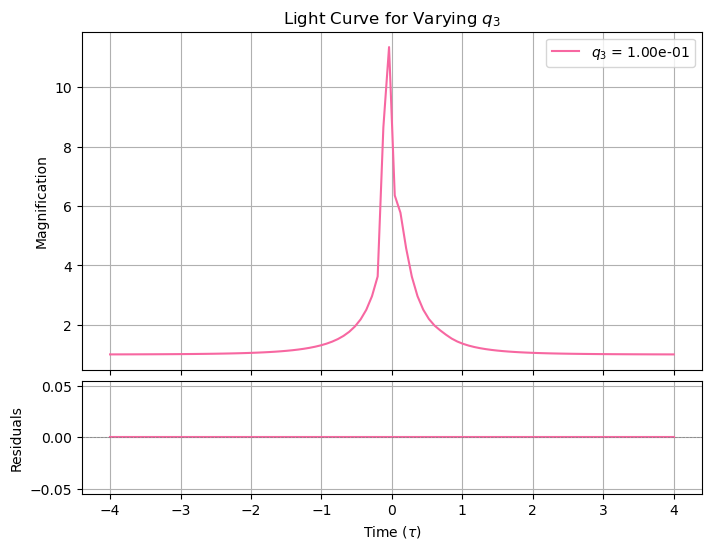

In [9]:
from ML import ThreeLens1S

event = ThreeLens1S(t0=0, tE=20, rho=0.01, u0_list=[0.1], q2=0.1, q3=.1,
                    s12=.8, s23=0.2, alpha=45, psi=120)

q3_values = [.1]
event.plot_caustic_critical_curves()
event.plot_light_curve()

event.plot_different_q3_lc(q3_values, reference_q3=1e-1)


# Testing Triplelens

In [3]:
import TripleLensing
import numpy as np

def calculate_image_positions(mlens, zlens_coords_xy_pairs, xs, ys):
    """
    Calculates the image positions for a triple lens system using the
    TripleLensing module.

    Args:
        mlens (list of float): Fractional lens masses [m1, m2, m3].
        zlens_coords_xy_pairs (list of float): Lens positions as a flat list
                                                [x1, y1, x2, y2, x3, y3].
        xs (float): Source position x-coordinate.
        ys (float): Source position y-coordinate.

    Returns:
        list of complex: A list of complex numbers representing all
                         mathematical image positions (roots of the lens equation).
                         For NLENS lenses, this will be NLENS*NLENS + 1 roots.
                         Further checks might be needed to identify "true"
                         physical images.
    """
    TRIL = TripleLensing.TripleLensing()
    nlens = len(mlens)
    
    # The C++ binding 'solv_lens_equation' expects zlens as [x1, x2, ..., xN, y1, y2, ..., yN]
    # Convert [x1,y1,x2,y2,...] to the required format
    zlens_cpp_format = [zlens_coords_xy_pairs[i*2] for i in range(nlens)] + \
                       [zlens_coords_xy_pairs[i*2+1] for i in range(nlens)]

    # Call the wrapped C++ function
    # The output zrxy_flat is [re1, re2, ..., re_DEGREE, im1, im2, ..., im_DEGREE]
    # where DEGREE = nlens*nlens + 1
    zrxy_flat = TRIL.solv_lens_equation(mlens, zlens_cpp_format, xs, ys, nlens)
    
    degree = nlens * nlens + 1
    
    real_parts = zrxy_flat[:degree]
    imag_parts = zrxy_flat[degree:degree*2] # Ensure to slice correctly up to 2*degree
    
    images = []
    for i in range(degree):
        images.append(complex(real_parts[i], imag_parts[i]))
        
    return images

# --- Example Usage (adapted from your basic usage.ipynb) ---
if __name__ == '__main__':
    # Lens system parameters from the notebook
    mlens_example = [0.968738798957637, 0.028093425169771, 0.003167775872591]
    # zlens example is [x1, y1, x2, y2, x3, y3]
    zlens_coords_example = [-0.039343051506317, 0.0, 
                            1.356656948493683, 0.0, 
                            0.638936196010800, -0.950873946634155]

    # Source center (example from the notebook, slightly different from the one used for magnification)
    xs_example = 0.7 
    ys_example = 0.0

    print(f"Calculating image positions for source at ({xs_example}, {ys_example})")
    image_pos = calculate_image_positions(mlens_example, zlens_coords_example, xs_example, ys_example)
    
    print(f"\nFound {len(image_pos)} potential image positions (roots):")
    for i, img_pos in enumerate(image_pos):
        print(f"Image {i+1}: {img_pos.real:.6f} + {img_pos.imag:.6f}j")

    # Note: To determine which of these are "true" lensed images,
    # you would typically check if substituting the image position (z)
    # back into the lens equation (zs_reconstructed = z - sum(m_i / conj(z - z_lens_i)))
    # results in zs_reconstructed being very close to the original source position (xs, ys).
    # The `TripleLensingLibrary.cpp` has a `trueSolution` function that performs this check,
    # but it's not directly exposed for individual roots via the `solv_lens_equation` binding.
    # Higher-level functions in the module (like for light curves or plotting)
    # often handle this internally.

Calculating image positions for source at (0.7, 0.0)

Found 10 potential image positions (roots):
Image 1: 0.634098 + -0.953213j
Image 2: 1.378164 + 0.230988j
Image 3: -0.089670 + -1.026043j
Image 4: -0.725952 + -0.001025j
Image 5: 1.380396 + -0.226689j
Image 6: 0.640052 + -0.946473j
Image 7: 1.510021 + -0.003032j
Image 8: 0.636578 + -0.951495j
Image 9: 1.342024 + -0.018023j
Image 10: 1.233793 + -0.001643j


In [1]:
import numpy as np
import TripleLensing # Assuming this has been built and installed

def calculate_image_positions(mlens, zlens_coords_xy_pairs, xs, ys):
    """
    Calculates the image positions for a triple lens system using the
    TripleLensing module.
    (This is the function from the previous response)d
    """
    TRIL = TripleLensing.TripleLensing()
    nlens = len(mlens)
    zlens_cpp_format = [zlens_coords_xy_pairs[i*2] for i in range(nlens)] + \
                       [zlens_coords_xy_pairs[i*2+1] for i in range(nlens)]
    zrxy_flat = TRIL.solv_lens_equation(mlens, zlens_cpp_format, xs, ys, nlens)
    degree = nlens * nlens + 1
    real_parts = zrxy_flat[:degree]
    imag_parts = zrxy_flat[degree:degree*2]
    images = []
    for i in range(degree):
        images.append(complex(real_parts[i], imag_parts[i]))
    return images

def true_solution(z_image, xs, ys, mlens, zlens_complex, so_leps=1.0e-10):
    """
    Python version of the trueSolution C++ function from TripleLensingLibrary.cpp.

    Checks if a potential image position 'z_image' is a true solution for
    a given source position (xs, ys) by using the lens equation.

    Args:
        z_image (complex): The potential image position to check.
        xs (float): The source position x-coordinate.
        ys (float): The source position y-coordinate.
        mlens (list or np.ndarray of float): The fractional masses of the lenses.
        zlens_complex (list or np.ndarray of complex): The positions of the lenses
                                                      as complex numbers.
        so_leps (float, optional): The tolerance for the check.
                                 Defaults to 1.0e-10, same as SOLEPS in the C++ code.

    Returns:
        bool: True if z_image is a true lensed image, False otherwise.
    """
    zs = complex(xs, ys)
    
    # This is the complex lens equation: zs = z - sum(m_i / conj(z - z_lens_i))
    # We rearrange it to see if the equation holds true for the given z.
    # dzs should be zero (or very close) for a true solution.
    dzs = zs - z_image
    for m, zl in zip(mlens, zlens_complex):
        dzs += m / (z_image.conjugate() - zl.conjugate())
        
    return abs(dzs) < so_leps

# --- Example: Finding and Filtering Images ---
if __name__ == '__main__':
    # Lens system parameters from the notebook
    mlens_example = [0.968738798957637, 0.028093425169771, 0.003167775872591]
    zlens_coords_example = [-0.039343051506317, 0.0, 
                            1.356656948493683, 0.0, 
                            0.638936196010800, -0.950873946634155]

    # Source position
    xs_example = 0.7 
    ys_example = 0.0

    # 1. Get all potential image positions (all roots) using the module from before
    all_images = calculate_image_positions(mlens_example, zlens_coords_example, xs_example, ys_example)
    print(f"Found {len(all_images)} total roots to check.")
    
    # 2. Convert lens coordinates to complex numbers for our new function
    zlens_complex_example = [complex(zlens_coords_example[i*2], zlens_coords_example[i*2+1]) for i in range(len(mlens_example))]

    # 3. Filter the roots to find the "true" images
    print("\nFiltering for true images...")
    true_images = []
    for i, img_pos in enumerate(all_images):
        is_true = true_solution(img_pos, xs_example, ys_example, mlens_example, zlens_complex_example)
        if is_true:
            print(f"  Image at {img_pos.real:.6f} + {img_pos.imag:.6f}j is TRUE")
            true_images.append(img_pos)
        else:
            # Pass on printing the false ones, they're not interesting
            pass
    
    print(f"\nFound {len(true_images)} true image(s). Not bad.")

Found 10 total roots to check.

Filtering for true images...
  Image at 1.378164 + 0.230988j is TRUE
  Image at -0.725952 + -0.001025j is TRUE
  Image at 1.380396 + -0.226689j is TRUE
  Image at 1.510021 + -0.003032j is TRUE
  Image at 1.233793 + -0.001643j is TRUE

Found 5 true image(s). Not bad.
